### Import libraries

In [8]:
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
# sample words
words = ['king', 'queen', 'man', 'woman', 'apple', 'banana', 'cat', 'dog', 
            'paris', 'france', 'london', 'england', 'elephant', 'car', 'bus']

### Word2Vec

[==================================================] 100.0% 1662.8/1662.8MB downloaded


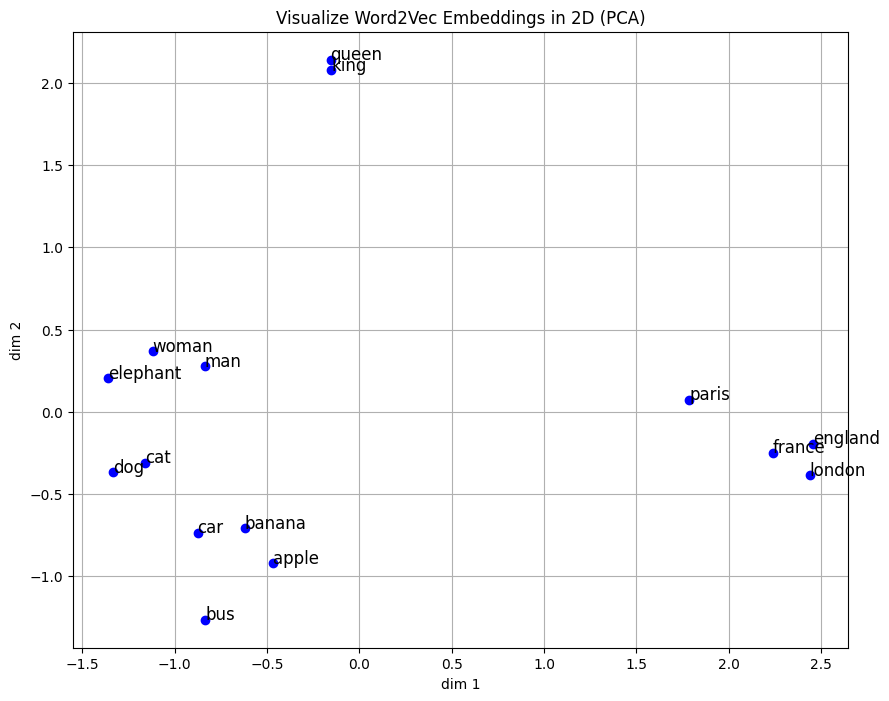

In [10]:
model = api.load("word2vec-google-news-300")

# get word vectors
vectors = np.array([model[word] for word in words])

# reduce to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# visualize
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue')
for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)
plt.title('Visualize Word2Vec Embeddings in 2D (PCA)')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.grid(True)
plt.show()

### GloVe

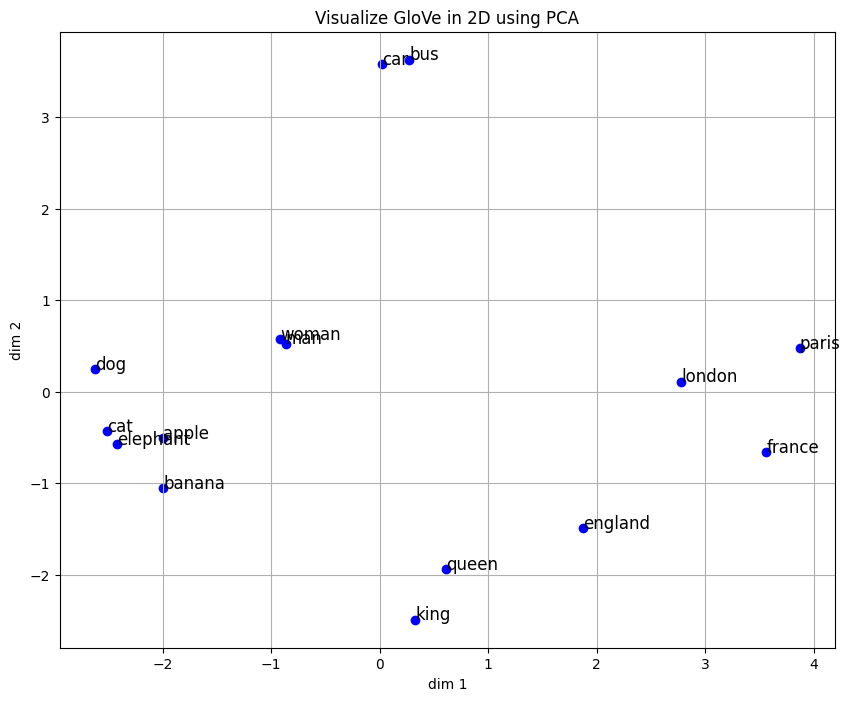

In [ ]:
model = api.load("glove-wiki-gigaword-50")

# get vectors for the words
vectors = np.array([model[word] for word in words])

# reduce to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# visualize
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue')

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)

plt.title('Visualize GloVe in 2D using PCA')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.grid(True)
plt.show()

### My Word2Vec

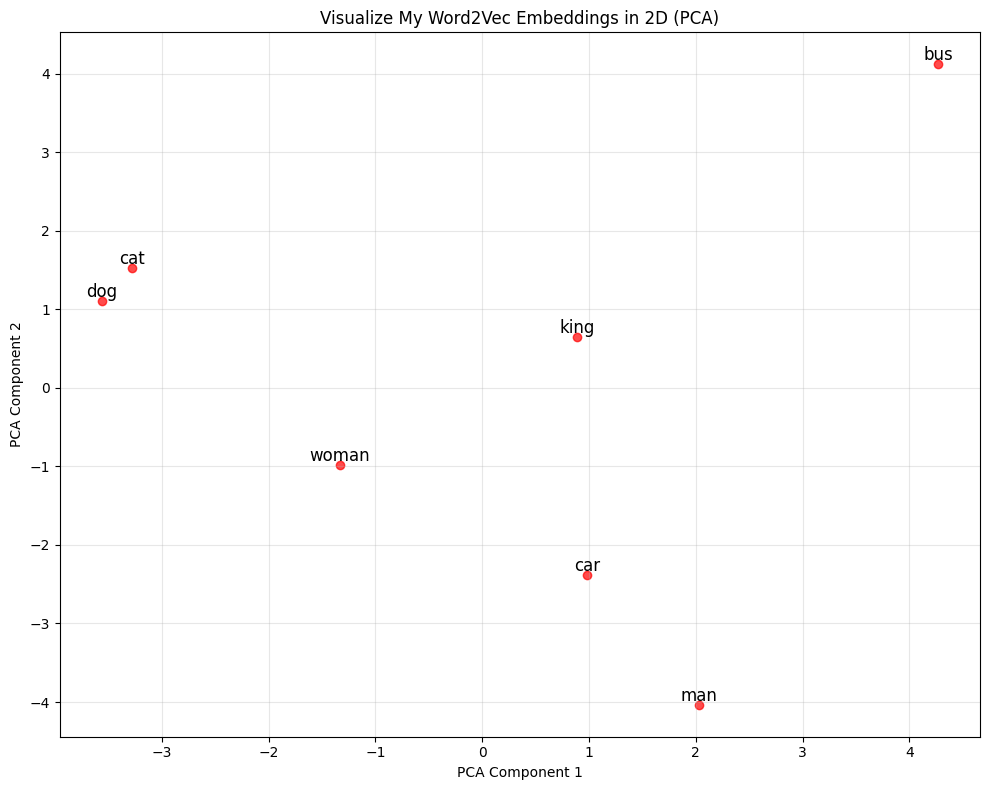

In [19]:
from gensim.models import Word2Vec
model = Word2Vec.load(r'F:\nlp2025\src\results\word2vec_ewt.model')

# get vectors for the words
vectors = np.array([model.wv[word] for word in words if word in model.wv])

# reduce to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# visualize
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='red', alpha=0.7)

for i, word in enumerate([w for w in words if w in model.wv]):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), 
                fontsize=12, ha='center', va='bottom')

plt.title('Visualize My Word2Vec Embeddings in 2D (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Nhận xét:

- Các mô hình có khả năng clustering ngữ nghĩa tốt:
    - Từ hoàng gia: 'king', 'queen' được nhóm gần nhau, thể hiện mối quan hệ về quyền lực/địa vị
    - Giới tính: 'man', 'woman' tạo thành cluster riêng biệt
    - Trái cây: 'apple', 'banana' được nhóm cùng nhau do cùng thuộc danh mục thực phẩm
    - Động vật: 'cat', 'dog' ở gần nhau do cùng là thú cưng
    - Địa danh: 'paris'-'france', 'london'-'england' thể hiện mối quan hệ địa lý
- Mô hình đã học được các mối quan hệ ngữ nghĩa, các từ cùng domain/category có xu hướng gần nhau trong không gian vector
- Điểm yếu và hạn chế:
    - Vấn đề về Analogical reasoning: Khoảng cách 'king'-'queen' > 'man'-'woman' cho thấy model chưa nắm bắt tốt quan hệ này
    - Lý tưởng: king - man ≈ queen - woman
    - Clustering không hoàn hảo: 'england' bị tách xa cluster địa danh, có thể do: Tần suất xuất hiện khác nhau trong corpus/Context sử dụng đa dạng hơn
- Ngoài ra, các hạn chế này có thể xảy ra do vector size còn thấp (GloVe chỉ có 50 chiều) và quá trình giảm chiều PCA đã làm mất mát một số thông tin quan trọng
- Mô hình tự train trên dữ liệu UD_English-EWT chưa được tốt ('man' còn cách khá xa 'woman') do tập dữ liệu huấn luyện còn nhỏ và được train trên ít epoch
